# Chronic Kidney Disease Classification

# Load Data

In [117]:
import pandas as pd
import numpy as np

ckd = pd.read_csv('C:/Users/terry/Documents/GitHub/Machine_Learning_Portfolio/Datasets/chronic_kidney_disease.csv')
ckd.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300,4.6,no,no,no,good,no,no,ckd


# Data Exploration

In [118]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
Age                        391 non-null float64
Blood Pressure             388 non-null float64
Specific Gravity           353 non-null float64
Albumin                    354 non-null float64
Sugar                      351 non-null float64
Red Blood Cells            248 non-null object
Pus Cell                   335 non-null object
Pus Cell Clumps            396 non-null object
Bacteria                   396 non-null object
Blood Glucose Random       356 non-null float64
Blood Urea                 381 non-null float64
Serum Creatinine           383 non-null float64
Sodium                     313 non-null float64
Potassium                  312 non-null float64
Hemoglobin                 348 non-null float64
Packed Cell Volume         329 non-null float64
White Blood Cell Count     295 non-null object
Red Blood Cell Count       270 non-null object
Hypertension               398 non-nu

In [119]:
#Drop columns with too many missing values
ckd.drop(columns=['Red Blood Cells', 'Red Blood Cell Count', 'White Blood Cell Count'], inplace=True)

cat_attribs = ['Specific Gravity','Albumin','Sugar','Pus Cell','Pus Cell Clumps','Bacteria','Hypertension',
               'Diabetes Mellitus','Coronary Artery Disease','Appetite','Pedal Edema','Anemia']

num_attribs = ['Age','Blood Pressure','Blood Glucose Random','Blood Urea','Serum Creatinine',
               'Sodium','Potassium','Hemoglobin','Packed Cell Volume']

#Drop records with missing categorical features
ckd.dropna(subset=cat_attribs, inplace=True)
ckd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 0 to 399
Data columns (total 22 columns):
Age                        318 non-null float64
Blood Pressure             317 non-null float64
Specific Gravity           323 non-null float64
Albumin                    323 non-null float64
Sugar                      323 non-null float64
Pus Cell                   323 non-null object
Pus Cell Clumps            323 non-null object
Bacteria                   323 non-null object
Blood Glucose Random       288 non-null float64
Blood Urea                 308 non-null float64
Serum Creatinine           308 non-null float64
Sodium                     252 non-null float64
Potassium                  252 non-null float64
Hemoglobin                 289 non-null float64
Packed Cell Volume         278 non-null float64
Hypertension               323 non-null object
Diabetes Mellitus          323 non-null object
Coronary Artery Disease    323 non-null object
Appetite                   323 non-nu

In [120]:
ckd[num_attribs].describe()

,Age,Blood Pressure,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume
count,318.000000,317.000000,288.000000,308.000000,308.000000,252.000000,252.000000,289.000000,278.000000
mean,50.125786,76.056782,147.385417,54.438636,2.598701,137.992063,4.675794,12.714879,39.212230
std,17.286687,12.320994,79.337110,49.956435,3.737093,7.461450,3.533642,2.838369,8.844113
min,2.000000,50.000000,22.000000,1.500000,0.400000,104.000000,2.500000,3.100000,9.000000
25%,40.000000,70.000000,100.000000,25.750000,0.900000,135.000000,3.800000,10.800000,33.000000
50%,53.000000,80.000000,121.000000,40.000000,1.200000,138.000000,4.400000,13.000000,41.000000
75%,63.000000,80.000000,158.250000,56.000000,2.500000,142.000000,4.900000,15.000000,46.000000
max,90.000000,120.000000,490.000000,391.000000,32.000000,163.000000,47.000000,17.800000,54.000000


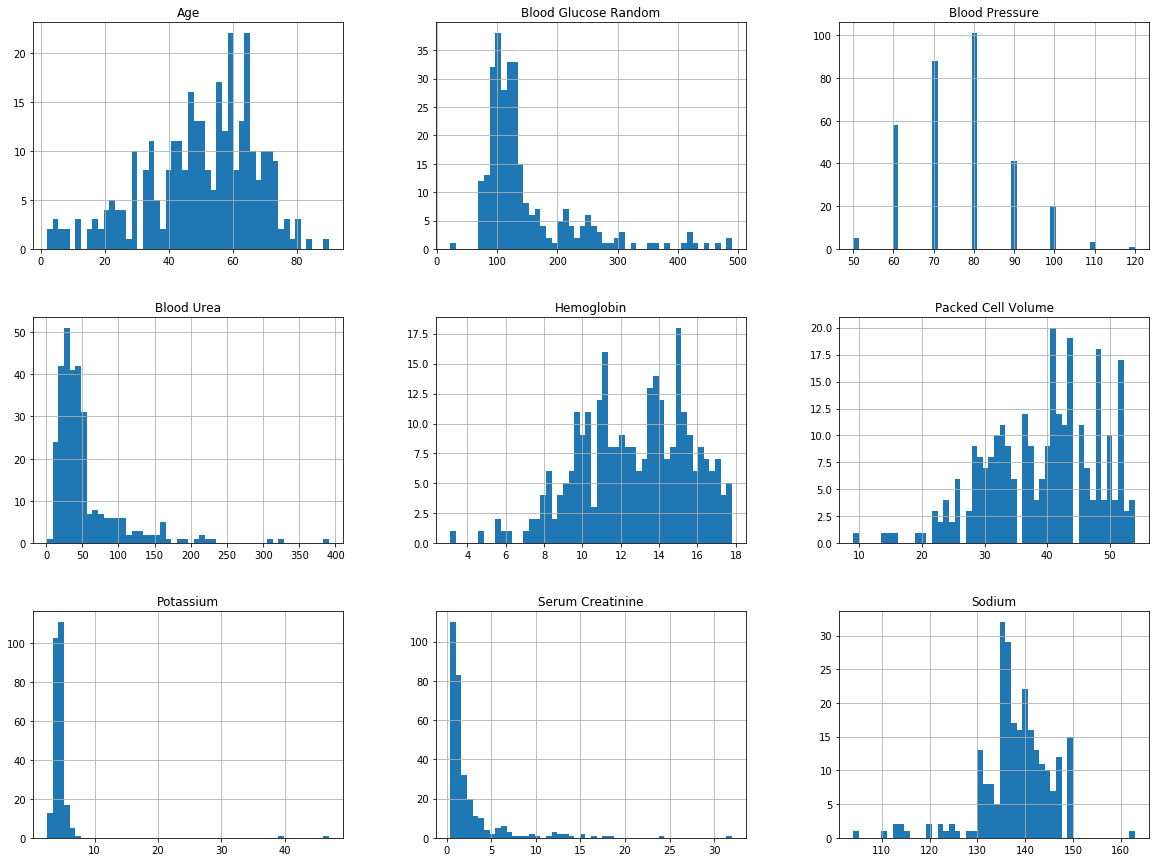

In [121]:
import matplotlib.pyplot as plt
ckd[num_attribs].hist(bins=50, figsize=(20,15))
plt.show()

# Generate Train/Test Split

In [127]:
import numpy as np
from sklearn.model_selection import train_test_split

ckd_X = ckd.drop('Class', axis=1)
ckd_y = ckd['Class'].copy()

X_train, X_test, y_train, y_test = train_test_split(ckd_X, ckd_y, test_size=0.2, random_state=42, shuffle=True)

In [128]:
#Set aside the test set and work with the training set
ckd = X_train.copy()

# Feature Correlation

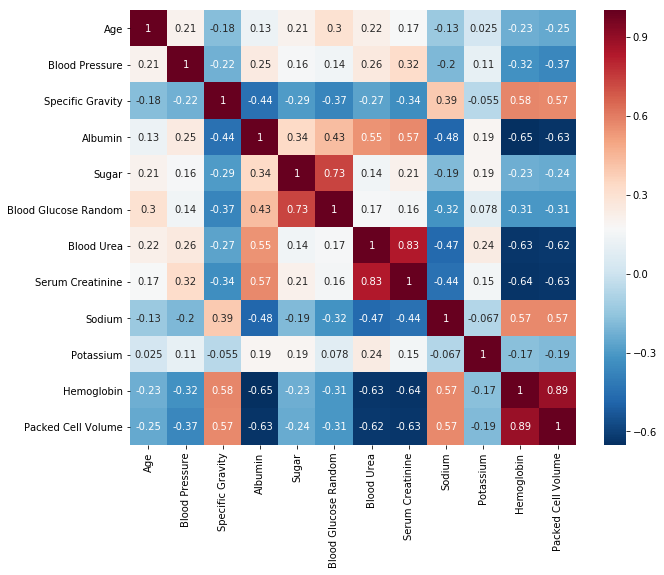

In [129]:
#Correlation Heat Map
import seaborn as sns

corr_matrix = ckd.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')

# Data Pre-processing Pipeline

In [130]:
#Process the data with a numerical and categorical pipeline
#The numerical pipeline fills missing values and scales the features
#The categorical pipeline encodes categorical features and does feature engineering

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

ckd_prepared = full_pipeline.fit_transform(X_train)
pd.DataFrame(ckd_prepared).head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-0.898017,1.158917,-0.541976,-0.094402,-0.266506,-0.134787,-0.164747,-0.271240,-0.027810,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.640116,0.335224,0.400237,2.025169,0.501186,-0.464407,0.237968,-1.806847,-1.792133,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.038891,-0.488469,-0.303009,-0.570223,-0.333262,0.030024,-0.054916,0.094381,-0.145431,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.070437,1.982609,-0.692184,-0.743249,-0.266506,1.348504,-0.018305,0.076100,0.207433,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.412244,1.158917,-0.303009,5.788487,3.538578,-1.947697,0.091526,-1.697161,-1.792133,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


# Linear SVM With Stochastic Gradient Descent

In [143]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42, loss='hinge')
scores = cross_val_score(sgd_clf, ckd_prepared, y_train, cv=3, scoring='accuracy')

print('Scores ', scores)
print('\nAverage Score: ', sum(scores) / len(scores))

Scores  [0.96551724 0.96511628 0.94117647]

Average Score:  0.9572699970124378


C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [144]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, ckd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([[147,   5],
       [  6, 100]], dtype=int64)

In [147]:
#Precsion, Recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

display(precision_score(y_train, y_train_pred, pos_label='ckd'))
display(recall_score(y_train, y_train_pred, pos_label='ckd'))
display(f1_score(y_train, y_train_pred, pos_label='ckd'))

0.9607843137254902

0.9671052631578947

0.9639344262295081

C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

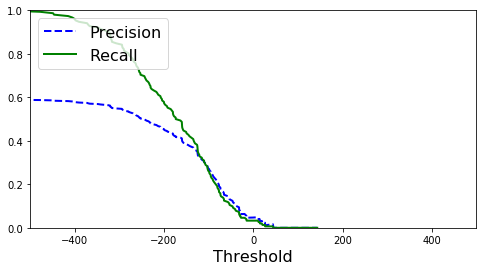

In [154]:
#Precision Recall Curve
y_scores = cross_val_predict(sgd_clf, ckd_prepared, y_train, cv=3, method="decision_function")
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores, pos_label='ckd')

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-500, 500])
plt.show()

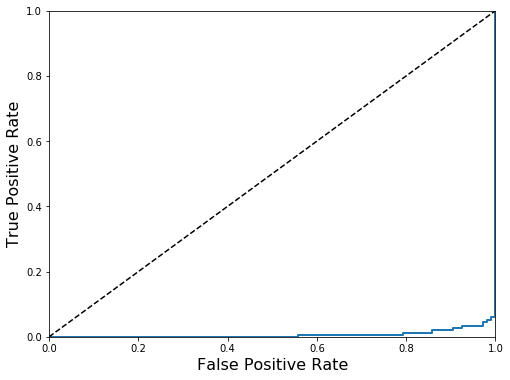

In [157]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores, pos_label='ckd')

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [160]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9931107249255213

# Logistic Regression With Stochastic Gradient Descent

In [166]:
sgd_clf = SGDClassifier(random_state=42, loss='log')
scores = cross_val_score(sgd_clf, ckd_prepared, y_train, cv=3, scoring='accuracy')

print('Accuracy: ', scores)
print('\nAverage Accuracy: ', sum(scores) / len(scores))

Accuracy:  [0.97701149 0.98837209 0.97647059]

Average Accuracy:  0.9806180585038078


C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [167]:
#Confusion Matrix
y_train_pred = cross_val_predict(sgd_clf, ckd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([[148,   4],
       [  1, 105]], dtype=int64)

In [168]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_train, y_train_pred, pos_label='ckd'))
print('Recall: ', recall_score(y_train, y_train_pred, pos_label='ckd'))
print('F1 Score: ', f1_score(y_train, y_train_pred, pos_label='ckd'))

Precision:  0.9932885906040269
Recall:  0.9736842105263158
F1 Score:  0.9833887043189369


In [171]:
#ROC AUC Score
y_scores = cross_val_predict(sgd_clf, ckd_prepared, y_train, cv=3, method="decision_function")
print('ROC AUC Score: ', roc_auc_score(y_train, y_scores))

ROC AUC Score:  0.9985104270109235


C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

# Support Vector Machine

In [179]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, loss='hinge')
scores = cross_val_score(svm_clf, ckd_prepared, y_train, cv=3, scoring='accuracy')

print('Accuracy: ', scores)
print('\nAverage Accuracy: ', sum(scores) / len(scores))

Accuracy:  [0.96551724 0.97674419 0.95294118]

Average Accuracy:  0.9650675346321368


In [180]:
#Confusion Matrix
y_train_pred = cross_val_predict(svm_clf, ckd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[144,   8],
       [  1, 105]], dtype=int64)

In [181]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_train, y_train_pred, pos_label='ckd'))
print('Recall: ', recall_score(y_train, y_train_pred, pos_label='ckd'))
print('F1 Score: ', f1_score(y_train, y_train_pred, pos_label='ckd'))

Precision:  0.993103448275862
Recall:  0.9473684210526315
F1 Score:  0.9696969696969696


In [182]:
#ROC AUC Score
y_scores = cross_val_predict(svm_clf, ckd_prepared, y_train, cv=3, method="decision_function")
print('ROC AUC Score: ', roc_auc_score(y_train, y_scores))

ROC AUC Score:  0.9983862959285006


# Kernelized Support Vector Machine

In [183]:
from sklearn.svm import SVC

poly_kernal_svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=5)
scores = cross_val_score(poly_kernal_svm_clf, ckd_prepared, y_train, cv=3, scoring='accuracy')

print('Accuracy: ', scores)
print('\nAverage Accuracy: ', sum(scores) / len(scores))

Accuracy:  [0.96551724 0.98837209 0.96470588]

Average Accuracy:  0.9728650722518358


C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [184]:
#Confusion Matrix
y_train_pred = cross_val_predict(poly_kernal_svm_clf, ckd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[145,   7],
       [  0, 106]], dtype=int64)

In [185]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_train, y_train_pred, pos_label='ckd'))
print('Recall: ', recall_score(y_train, y_train_pred, pos_label='ckd'))
print('F1 Score: ', f1_score(y_train, y_train_pred, pos_label='ckd'))

Precision:  1.0
Recall:  0.9539473684210527
F1 Score:  0.9764309764309764


In [186]:
#ROC AUC Score
y_scores = cross_val_predict(poly_kernal_svm_clf, ckd_prepared, y_train, cv=3, method="decision_function")
print('ROC AUC Score: ', roc_auc_score(y_train, y_scores))

ROC AUC Score:  0.9994414101290964


C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Guassian RBF Kernal

In [190]:
rbf_kernal_svm_clf = SVC(kernel='rbf', gamma=5, C=0.001)
scores = cross_val_score(rbf_kernal_svm_clf, ckd_prepared, y_train, cv=3, scoring='accuracy')

print('Accuracy: ', scores)
print('\nAverage Accuracy: ', sum(scores) / len(scores))

Accuracy:  [0.5862069  0.59302326 0.58823529]

Average Accuracy:  0.5891551488277749


In [191]:
#Confusion Matrix
y_train_pred = cross_val_predict(rbf_kernal_svm_clf, ckd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[152,   0],
       [106,   0]], dtype=int64)

In [192]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_train, y_train_pred, pos_label='ckd'))
print('Recall: ', recall_score(y_train, y_train_pred, pos_label='ckd'))
print('F1 Score: ', f1_score(y_train, y_train_pred, pos_label='ckd'))

Precision:  0.5891472868217055
Recall:  1.0
F1 Score:  0.7414634146341463


In [193]:
#ROC AUC Score
y_scores = cross_val_predict(rbf_kernal_svm_clf, ckd_prepared, y_train, cv=3, method="decision_function")
print('ROC AUC Score: ', roc_auc_score(y_train, y_scores))

ROC AUC Score:  0.9887040714995036


# Decision Tree

In [196]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(tree_clf, ckd_prepared, y_train, cv=3, scoring='accuracy')

print('Accuracy: ', scores)
print('\nAverage Accuracy: ', sum(scores) / len(scores))

Accuracy:  [0.95402299 0.94186047 0.96470588]

Average Accuracy:  0.9535297786583224


In [197]:
#Confusion Matrix
y_train_pred = cross_val_predict(tree_clf, ckd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[146,   6],
       [  6, 100]], dtype=int64)

In [198]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_train, y_train_pred, pos_label='ckd'))
print('Recall: ', recall_score(y_train, y_train_pred, pos_label='ckd'))
print('F1 Score: ', f1_score(y_train, y_train_pred, pos_label='ckd'))

Precision:  0.9605263157894737
Recall:  0.9605263157894737
F1 Score:  0.9605263157894737


In [205]:
#ROC AUC Score
y_scores = cross_val_predict(tree_clf, ckd_prepared, y_train, cv=3, method="predict_proba")
print('ROC AUC Score: ', roc_auc_score(y_train, y_scores[:,1]))

ROC AUC Score:  0.9659260178748759


# Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
scores = cross_val_score(rnd_clf, ckd_prepared, y_train, cv=3, scoring='accuracy')

print('Accuracy: ', scores)
print('\nAverage Accuracy: ', sum(scores) / len(scores))

Accuracy:  [1.         0.98837209 1.        ]

Average Accuracy:  0.9961240310077519


In [207]:
#Confusion Matrix
y_train_pred = cross_val_predict(rnd_clf, ckd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[151,   1],
       [  1, 105]], dtype=int64)

In [208]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_train, y_train_pred, pos_label='ckd'))
print('Recall: ', recall_score(y_train, y_train_pred, pos_label='ckd'))
print('F1 Score: ', f1_score(y_train, y_train_pred, pos_label='ckd'))

Precision:  0.993421052631579
Recall:  0.993421052631579
F1 Score:  0.993421052631579


In [209]:
#ROC AUC Score
y_scores = cross_val_predict(rnd_clf, ckd_prepared, y_train, cv=3, method="predict_proba")
print('ROC AUC Score: ', roc_auc_score(y_train, y_scores[:,1]))

ROC AUC Score:  0.999875868917577


In [220]:
#Feature Importance
rnd_clf.fit(ckd_prepared, y_train)
feature_importance = rnd_clf.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]

def encoded_col_names(col_names, enc_col):
    result = list()
    for col_name, col_values in zip(col_names, enc_col):
        for val in col_values:
            result.append(str(col_name) + '_' + str(val))
    return result

enc_attribs = encoded_col_names(cat_attribs, cat_encoder.categories_)
col_names = num_attribs + enc_attribs
sorted(zip(feature_importance, col_names), reverse=True) 

[(0.230399491254256, 'Hemoglobin'),
 (0.12003764101973446, 'Serum Creatinine'),
 (0.10747796241851701, 'Albumin_0.0'),
 (0.10184990814112524, 'Packed Cell Volume'),
 (0.05198701586373427, 'Specific Gravity_1.01'),
 (0.03518933785961696, 'Hypertension_yes'),
 (0.03208429470744423, 'Hypertension_no'),
 (0.031086751170265325, 'Blood Urea'),
 (0.030018411272739135, 'Sodium'),
 (0.029877947290221567, 'Diabetes Mellitus_no'),
 (0.029027644901939213, 'Blood Glucose Random'),
 (0.02666756135659521, 'Diabetes Mellitus_yes'),
 (0.026411880476670823, 'Specific Gravity_1.015'),
 (0.021264256165007513, 'Specific Gravity_1.025'),
 (0.016339122913233504, 'Specific Gravity_1.02'),
 (0.015749337150889924, 'Blood Pressure'),
 (0.012397282700610229, 'Pus Cell_abnormal'),
 (0.012226201999343185, 'Age'),
 (0.009737470078768871, 'Pus Cell_normal'),
 (0.009525265431835088, 'Appetite_poor'),
 (0.00940042058558617, 'Appetite_good'),
 (0.008696660221258163, 'Potassium'),
 (0.005207689077369105, 'Pedal Edema_no'

# AdaBoost

In [232]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5)
scores = cross_val_score(ada_clf, ckd_prepared, y_train, cv=3, scoring='accuracy')

print('Accuracy: ', scores)
print('\nAverage Accuracy: ', sum(scores) / len(scores))

Accuracy:  [0.98850575 0.95348837 0.97647059]

Average Accuracy:  0.9728215691515847


In [233]:
#Confusion Matrix
y_train_pred = cross_val_predict(ada_clf, ckd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[145,   7],
       [  0, 106]], dtype=int64)

In [234]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_train, y_train_pred, pos_label='ckd'))
print('Recall: ', recall_score(y_train, y_train_pred, pos_label='ckd'))
print('F1 Score: ', f1_score(y_train, y_train_pred, pos_label='ckd'))

Precision:  1.0
Recall:  0.9539473684210527
F1 Score:  0.9764309764309764


In [235]:
#ROC AUC Score
y_scores = cross_val_predict(ada_clf, ckd_prepared, y_train, cv=3, method="predict_proba")
print('ROC AUC Score: ', roc_auc_score(y_train, y_scores[:,1]))

ROC AUC Score:  1.0


# Gradient Boosting

In [246]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=1)
scores = cross_val_score(gbc_clf, ckd_prepared, y_train, cv=3, scoring='accuracy')

print('Accuracy: ', scores)
print('\nAverage Accuracy: ', sum(scores) / len(scores))

Accuracy:  [0.97701149 0.98837209 0.96470588]

Average Accuracy:  0.9766964898763568


In [247]:
#Confusion Matrix
y_train_pred = cross_val_predict(gbc_clf, ckd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[150,   2],
       [  2, 104]], dtype=int64)

In [248]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_train, y_train_pred, pos_label='ckd'))
print('Recall: ', recall_score(y_train, y_train_pred, pos_label='ckd'))
print('F1 Score: ', f1_score(y_train, y_train_pred, pos_label='ckd'))

Precision:  0.9868421052631579
Recall:  0.9868421052631579
F1 Score:  0.9868421052631579


In [249]:
#ROC AUC Score
y_scores = cross_val_predict(gbc_clf, ckd_prepared, y_train, cv=3, method="predict_proba")
print('ROC AUC Score: ', roc_auc_score(y_train, y_scores[:,1]))

ROC AUC Score:  0.9975794438927509


# Voting Classifier

In [276]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('gbc', gbc_clf), ('ada', ada_clf), ('rnd', rnd_clf), ('tree', tree_clf), ('kern_svm', poly_kernal_svm_clf)],
    voting='hard')
scores = cross_val_score(voting_clf, ckd_prepared, y_train, cv=3, scoring='accuracy')

print('Accuracy: ', scores)
print('\nAverage Accuracy: ', sum(scores) / len(scores))

C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy:  [1. 1. 1.]

Average Accuracy:  1.0


In [277]:
#Confusion Matrix
y_train_pred = cross_val_predict(voting_clf, ckd_prepared, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[151,   1],
       [  0, 106]], dtype=int64)

In [278]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_train, y_train_pred, pos_label='ckd'))
print('Recall: ', recall_score(y_train, y_train_pred, pos_label='ckd'))
print('F1 Score: ', f1_score(y_train, y_train_pred, pos_label='ckd'))

Precision:  1.0
Recall:  0.993421052631579
F1 Score:  0.9966996699669968


# Principal Component Analysis (PCA)

In [272]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
ckd_reduced = pca.fit_transform(ckd_prepared)

#Voting Classifier with reduced dataset
voting_clf = VotingClassifier(
    estimators=[('gbc', gbc_clf), ('ada', ada_clf), ('rnd', rnd_clf), ('tree', tree_clf), ('kern_svm', poly_kernal_svm_clf)],
    voting='hard')
scores = cross_val_score(voting_clf, ckd_reduced, y_train, cv=3, scoring='accuracy')

print('Number of Components: ', pca.n_components_)
print('Accuracy: ', scores)
print('\nAverage Accuracy: ', sum(scores) / len(scores))

C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of Components:  26
Accuracy:  [0.94252874 1.         0.95294118]

Average Accuracy:  0.9651566373675907


In [274]:
#Confusion Matrix
y_train_pred = cross_val_predict(voting_clf, ckd_reduced, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[145,   7],
       [  4, 102]], dtype=int64)

In [275]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_train, y_train_pred, pos_label='ckd'))
print('Recall: ', recall_score(y_train, y_train_pred, pos_label='ckd'))
print('F1 Score: ', f1_score(y_train, y_train_pred, pos_label='ckd'))

Precision:  0.9731543624161074
Recall:  0.9539473684210527
F1 Score:  0.9634551495016611


# Final Model On Test Set

In [281]:
#Selected model: Voting Classifier
from sklearn.metrics import mean_squared_error

final_model = voting_clf.fit(ckd_prepared, y_train)

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, final_predictions)

C:\Users\terry\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [282]:
#Confusion Matrix
confusion_matrix(y_test, final_predictions)

array([[38,  0],
       [ 0, 27]], dtype=int64)

In [283]:
#Precision, Recall, F1 Score
print('Precision: ', precision_score(y_test, final_predictions, pos_label='ckd'))
print('Recall: ', recall_score(y_test, final_predictions, pos_label='ckd'))
print('F1 Score: ', f1_score(y_test, final_predictions, pos_label='ckd'))

Precision:  1.0
Recall:  1.0
F1 Score:  1.0
